## Error Metrics for Regression Models

### Mean Squared Error

$\textrm{MSE} =  \frac{1}{M}\sum_{\forall m\in M}{(y_m -\hat{y}_m)^2}$

In [4]:
!pip install -U matplotlib

  Using cached matplotlib-3.4.3-cp38-cp38-win_amd64.whl (7.1 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\gcast\\anaconda3\\Lib\\site-packages\\matplotlib\\_c_internal_utils.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



>1.0, 1.0 = 0.000
>1.0, 0.9 = 0.010
>1.0, 0.8 = 0.040
>1.0, 0.7 = 0.090
>1.0, 0.6 = 0.160
>1.0, 0.5 = 0.250
>1.0, 0.4 = 0.360
>1.0, 0.3 = 0.490
>1.0, 0.2 = 0.640
>1.0, 0.1 = 0.810
>1.0, 0.0 = 1.000


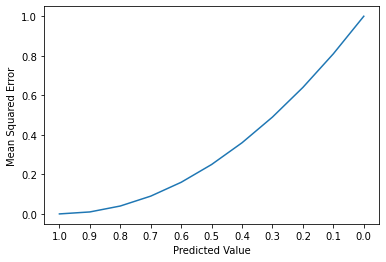

In [1]:
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

# example of increase in mean squared error
# real value
expected = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# predicted value
predicted = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]

# calculate errors
errors = list()
for i in range(len(expected)):
	# calculate error
	err = (expected[i] - predicted[i])**2
	# store error
	errors.append(err)
	# report error
	print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()

In [2]:
# Overall MSE error
MSE = mean_squared_error(expected, predicted)
# report error
print(MSE)

0.35000000000000003


In [3]:
# calculate Root Mean Squared Error
RMSE = mean_squared_error(expected, predicted, squared=False)
# report error
print(RMSE)

0.5916079783099616


### Mean Absolute Error
$\textrm{MAE} =  \frac{1}{M}\sum_{\forall m\in M}\mid{y_m -\hat{y}_m\mid}$

>1.0, 1.0 = 0.000
>1.0, 0.9 = 0.100
>1.0, 0.8 = 0.200
>1.0, 0.7 = 0.300
>1.0, 0.6 = 0.400
>1.0, 0.5 = 0.500
>1.0, 0.4 = 0.600
>1.0, 0.3 = 0.700
>1.0, 0.2 = 0.800
>1.0, 0.1 = 0.900
>1.0, 0.0 = 1.000


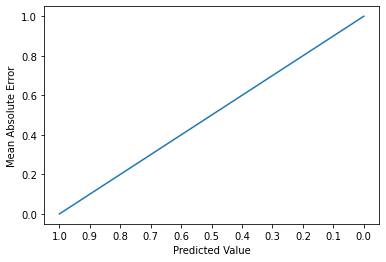

In [4]:
# Mean Absolute Error
errors = list()
for i in range(len(expected)):
	# calculate error
	err = abs((expected[i] - predicted[i]))
	# store error
	errors.append(err)
	# report error
	print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Absolute Error')
pyplot.show()

In [5]:
from sklearn.metrics import mean_absolute_error
# calculate errors
MAE = mean_absolute_error(expected, predicted)
# report error
print(MAE)

0.5


In [6]:
# example outliers
# predicted value
predicted = [1.0, 0.9, 0.91, 0.97, 0.96, 0.85, 0.84, 0.93, 0.982, 0.91, 0.90]
RMSE =mean_squared_error(expected, predicted, squared=False)
MAE = mean_absolute_error(expected, predicted)
print('RMSE =',RMSE,'MAE =',MAE)

RMSE = 0.09146484669980146 MAE = 0.07709090909090908


In [7]:
# predicted value with outliers
predicted = [1.0, 0.9, 0.91, 3.97, 0.96, 0.85, 0.84, 0.93, 0.982, 0.91, 0.90]
RMSE =mean_squared_error(expected, predicted, squared=False)
MAE = mean_absolute_error(expected, predicted)
print('RMSE =',RMSE,'MAE =',MAE)

RMSE = 0.9001022164176691 MAE = 0.34436363636363637


## coefficient of determination (R2 score)

$R2 = 1 - \frac{ \sum_{\forall m\in M}\mid{y_m -\hat{y}_m\mid}}{  \sum_{\forall m\in M}\mid{y_m -\bar{y}\mid}},\qquad \bar{y} = \frac{1}{M}{\sum_{\forall m} y_m}$

In [8]:
from sklearn.metrics import r2_score
expected = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
predicted = [1.0, 0.9, 0.91, 0.97, 0.96, 0.85, 0.84, 0.93, 0.982, 0.91, 0.90]
r2_score(expected, predicted)

0.0

In [9]:
predicted = [1.0, 0.9, 0.91, 3.97, 0.96, 0.85, 0.84, 0.93, 0.982, 0.91, 0.90]
r2_score(expected, predicted)

0.0

In [10]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn import datasets
%matplotlib inline

In [11]:
df = pd.read_csv('Data/cal_housing_clean.csv')
df.dropna()
print(df.keys(), df.shape)

Index(['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome', 'medianHouseValue'],
      dtype='object') (20640, 7)
